# Task A: Data Exploration and Auditing

## A1

#### 1. There are 5 variables and 5792 data instances ( 5792 rows * 5 columns)


# Hello


##  Hello

In [2]:
import pandas as pd
data = pd.read_csv('monthly_smartcard_replacements.csv')
df = pd.DataFrame(data)
df.rename(columns = {'Smartcard.Type':'Smartcard Type', 
                     'Action.Reason':'Action Reason', 
                     'Number.of.transactions':'Number of transactions'}, inplace=True)
df

,Month,Transaction,Smartcard Type,Action Reason,Number of transactions
0,2019-03,Replace Smartcard,Photo Identification Card,Change Customer Details,156
1,2019-03,Replace Smartcard,Driver Licence Card,Destroyed,110
2,2019-03,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48
3,2019-03,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8
4,2019-03,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7
...,...,...,...,...,...
5787,2020-11,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1
5788,2020-12,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5789,2021-07,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5790,2021-07,Replace Smartcard,Photo Identification Card,Merged,1


## A2
#### There is no null value in any action of reason

In [3]:
count_null = pd.isnull
count_null = df[count_null].count().reset_index()
count_null.columns.values[0] = 'Column'
count_null.columns.values[1] = 'Number of null values'
count_null

,Column,Number of null values
0,Month,0
1,Transaction,0
2,Smartcard Type,0
3,Action Reason,0
4,Number of transactions,0


## A3
#### Data types for each column are:

In [4]:
column_types = df.dtypes.reset_index()
column_types.columns.values[0] = 'Column'
column_types.columns.values[1] = 'Type'
column_types

,Column,Type
0,Month,object
1,Transaction,object
2,Smartcard Type,object
3,Action Reason,object
4,Number of transactions,int64


## A4
#### Convert column “Month” into datetime format


In [5]:
df["Month"] = pd.to_datetime(df["Month"])
df

,Month,Transaction,Smartcard Type,Action Reason,Number of transactions
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7
...,...,...,...,...,...
5787,2020-11-01,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1
5788,2020-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5789,2021-07-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5790,2021-07-01,Replace Smartcard,Photo Identification Card,Merged,1


## A5
#### Observation 1: The maximum value (which is 9097) is much higher than the rest of the values (vary between 1 and 84)

#### Observation 2: Most of the values are around 845


In [6]:
statistics = df["Number of transactions"].describe().reset_index()
statistics.columns.values[0] = 'Statistics' 
statistics

,Statistics,Number of transactions
0,count,5792.000000
1,mean,303.241540
2,std,845.056684
3,min,1.000000
4,25%,5.000000
5,50%,18.000000
6,75%,84.000000
7,max,9097.000000


## A6

#### 1. There are 4 different types of smartcard types. They are shown as below with their number of instances 
- Driver Licence Card: 1896
- Photo Identification Card: 1631
- Industry Authority Card: 1218
- Marine Licence Ind Card: 1047

In [7]:
unique_smartcard = df["Smartcard Type"].nunique()
unique_smartcard

4

In [8]:
diff_smartcard_type = pd.DataFrame(df['Smartcard Type'].value_counts()).reset_index()
diff_smartcard_type.columns.values[0] = 'Smartcard Type'
diff_smartcard_type.columns.values[1] = 'Instances'
diff_smartcard_type

,Smartcard Type,Instances
0,Driver Licence Card,1896
1,Photo Identification Card,1631
2,Industry Authority Card,1218
3,Marine Licence Ind Card,1047


#### 2. Percentage of Driver Licence Card is 32.734807


In [9]:
percentage_driver_licence = (df['Smartcard Type'].value_counts(normalize = True) * 100).reset_index()
percentage_driver_licence.columns.values[0] = 'Smartcard Type'
percentage_driver_licence.columns.values[1] = 'Percentage'
percentage_driver_licence.loc[0]

Smartcard Type    Driver Licence Card
Percentage                  32.734807
Name: 0, dtype: object

## A7
#### 1. The different reasons for smartcard replacements in the given data are shown as below (the number of instances are included)

In [10]:
diff_reasons = df['Action Reason'].value_counts().reset_index()
diff_reasons.columns.values[0] = 'Action Reason'
diff_reasons.columns.values[1] = 'Instances'
diff_reasons

,Action Reason,Instances
0,Lost,539
1,Managers Approval,532
2,Change Customer Details,521
3,Lost In Mail - Imu,519
4,Stolen,471
5,Destroyed,379
6,Condition Change,364
7,Faulty,344
8,Damaged,342
9,Product Exists Othr Surrend Void Cancel,321


#### 2. The total number of months in which 100 or more smartcard replacements are reported due to being "Lost": 264

In [11]:
lost_value = df[df['Action Reason'] == 'Lost']
lost_value["Month"][lost_value["Number of transactions"] >= 100].count()

264

# Task B: Group Level Analysis and Visualisation

## B1
#### 1. Create a new column named 'Year' by extracting the year from the 'Month' column

In [12]:
df['Year'] = df['Month'].dt.year
df

,Month,Transaction,Smartcard Type,Action Reason,Number of transactions,Year
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156,2019
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110,2019
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48,2019
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8,2019
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7,2019
...,...,...,...,...,...,...
5787,2020-11-01,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1,2020
5788,2020-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2020
5789,2021-07-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2021
5790,2021-07-01,Replace Smartcard,Photo Identification Card,Merged,1,2021


#### 2. Line plot showing total number of annual smartcard replacements (number of transactions) against year.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

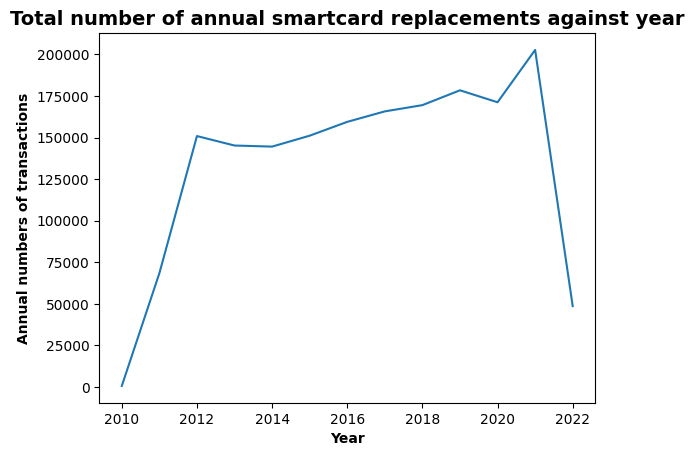

In [14]:
number_of_transactions_against_year = df.groupby(['Year']).sum()
number_of_transactions_against_year
plt.plot(number_of_transactions_against_year)
plt.title("Total number of annual smartcard replacements against year", weight='bold', size=14)
plt.xlabel('Year', weight='bold', size=10)
plt.ylabel('Annual numbers of transactions', weight='bold', size=10)
plt.show()

#### 3. Trend Observation:
- Overall, the total number of annual smartcard replacements against year had an upward trend between 2010 and 2021. However, in 2022, there has been a significant decrease in the total numbers, which is different from previous years. 
- This phenomenon may be due to the fact that the year 2022 hasn’t ended yet, therefore resulting in the lack of record of smart card replacements in 2022 which significantly decrease the annual numbers of transactions of 2022

## B2

#### 1. Barchart showing the total number of transactions for each ‘Action.Reason’ using the available data


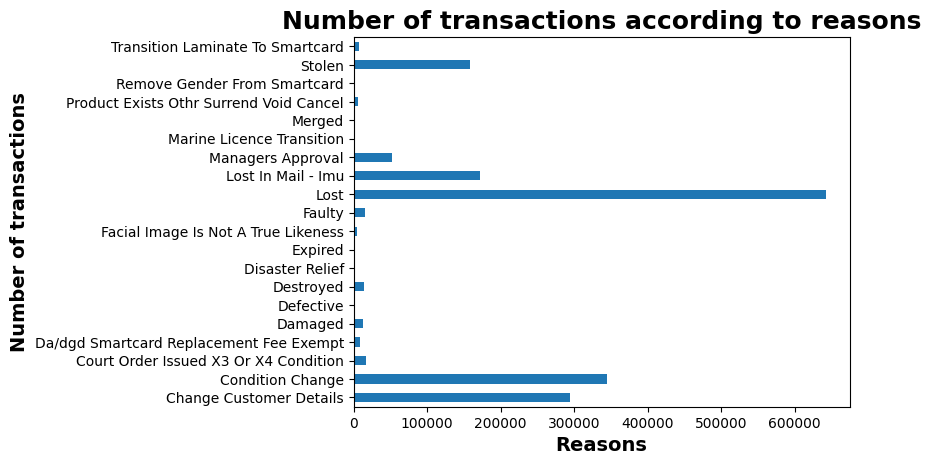

In [15]:
groupby_reason = df.groupby(['Action Reason'])['Number of transactions'].sum()
bar_chart = groupby_reason.plot.barh()
plt.title('Number of transactions according to reasons', weight='bold', size=18)
plt.xlabel('Reasons', weight='bold', size=14)
plt.ylabel('Number of transactions', weight='bold', size=14)
plt.show()

#### 2. Top three reasons for smart card replacement are: 
- Change Customer Details
- Condition Change
- Lost

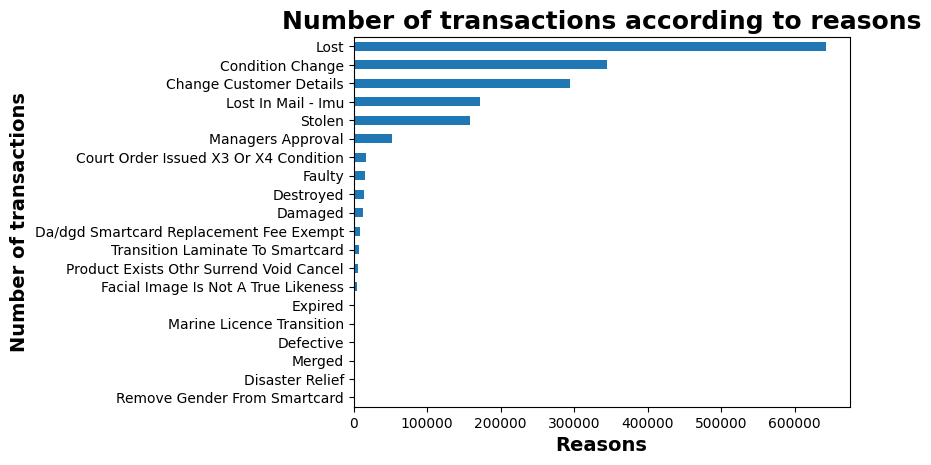

In [16]:
groupby_reason=df.groupby(['Action Reason'])['Number of transactions'].sum(['Number of transactions']).sort_values()
bar_chart = groupby_reason.plot.barh()
plt.title('Number of transactions according to reasons', weight='bold', size=18)
plt.xlabel('Reasons', weight='bold', size=14)
plt.ylabel('Number of transactions', weight='bold', size=14)
plt.show()


#### 3. Total number of transactions of which 'Action.Reason' is between 1000 and 2000:
- Marine Licence Transition: 1822

In [17]:
groupby_reason = pd.DataFrame(groupby_reason)
filt = (groupby_reason['Number of transactions'] >= 1000) & (groupby_reason['Number of transactions'] <= 2000)
groupby_reason[filt]

,Number of transactions
Action Reason,
Marine Licence Transition,1822


## B3

#### 1. the annual number of transactions for each 'Action.Reason' over different years 

In [18]:
groupby_annual_reason = df.groupby(['Action Reason', 'Year'])['Number of transactions'].sum()
groupby_annual_reason = pd.DataFrame(groupby_annual_reason)
groupby_annual_reason

Number of transactions
Action Reason                    Year                        
Change Customer Details          2010                      84
                                 2011                   12265
                                 2012                   28446
                                 2013                   28603
                                 2014                   28188
...                                                       ...
Transition Laminate To Smartcard 2018                     410
                                 2019                     453
                                 2020                     576
                                 2021                     738
                                 2022                     156

[236 rows x 1 columns]

#### 2. The number of years that the number of annual transactions exceed 10000 for each action reason

In [19]:
filt_exceed_10k = groupby_annual_reason[groupby_annual_reason['Number of transactions'] >= 10000]
result = filt_exceed_10k.groupby(['Action Reason']).size().reset_index()
result.columns.values[1] = 'Number of years'
result

,Action Reason,Number of years
0,Change Customer Details,11
1,Condition Change,11
2,Lost,12
3,Lost In Mail - Imu,8
4,Stolen,10


#### 3. Action reasons have at least one year with the number of annual transactions exceeding 10000 are:
- Change Customer Details
- Condition Change
- Lost
- Lost In Mail - lmu
- Stolen

#### 4. histogram to analyzing the distribution of the annual number of transactions per action reason as calculated in B3.1

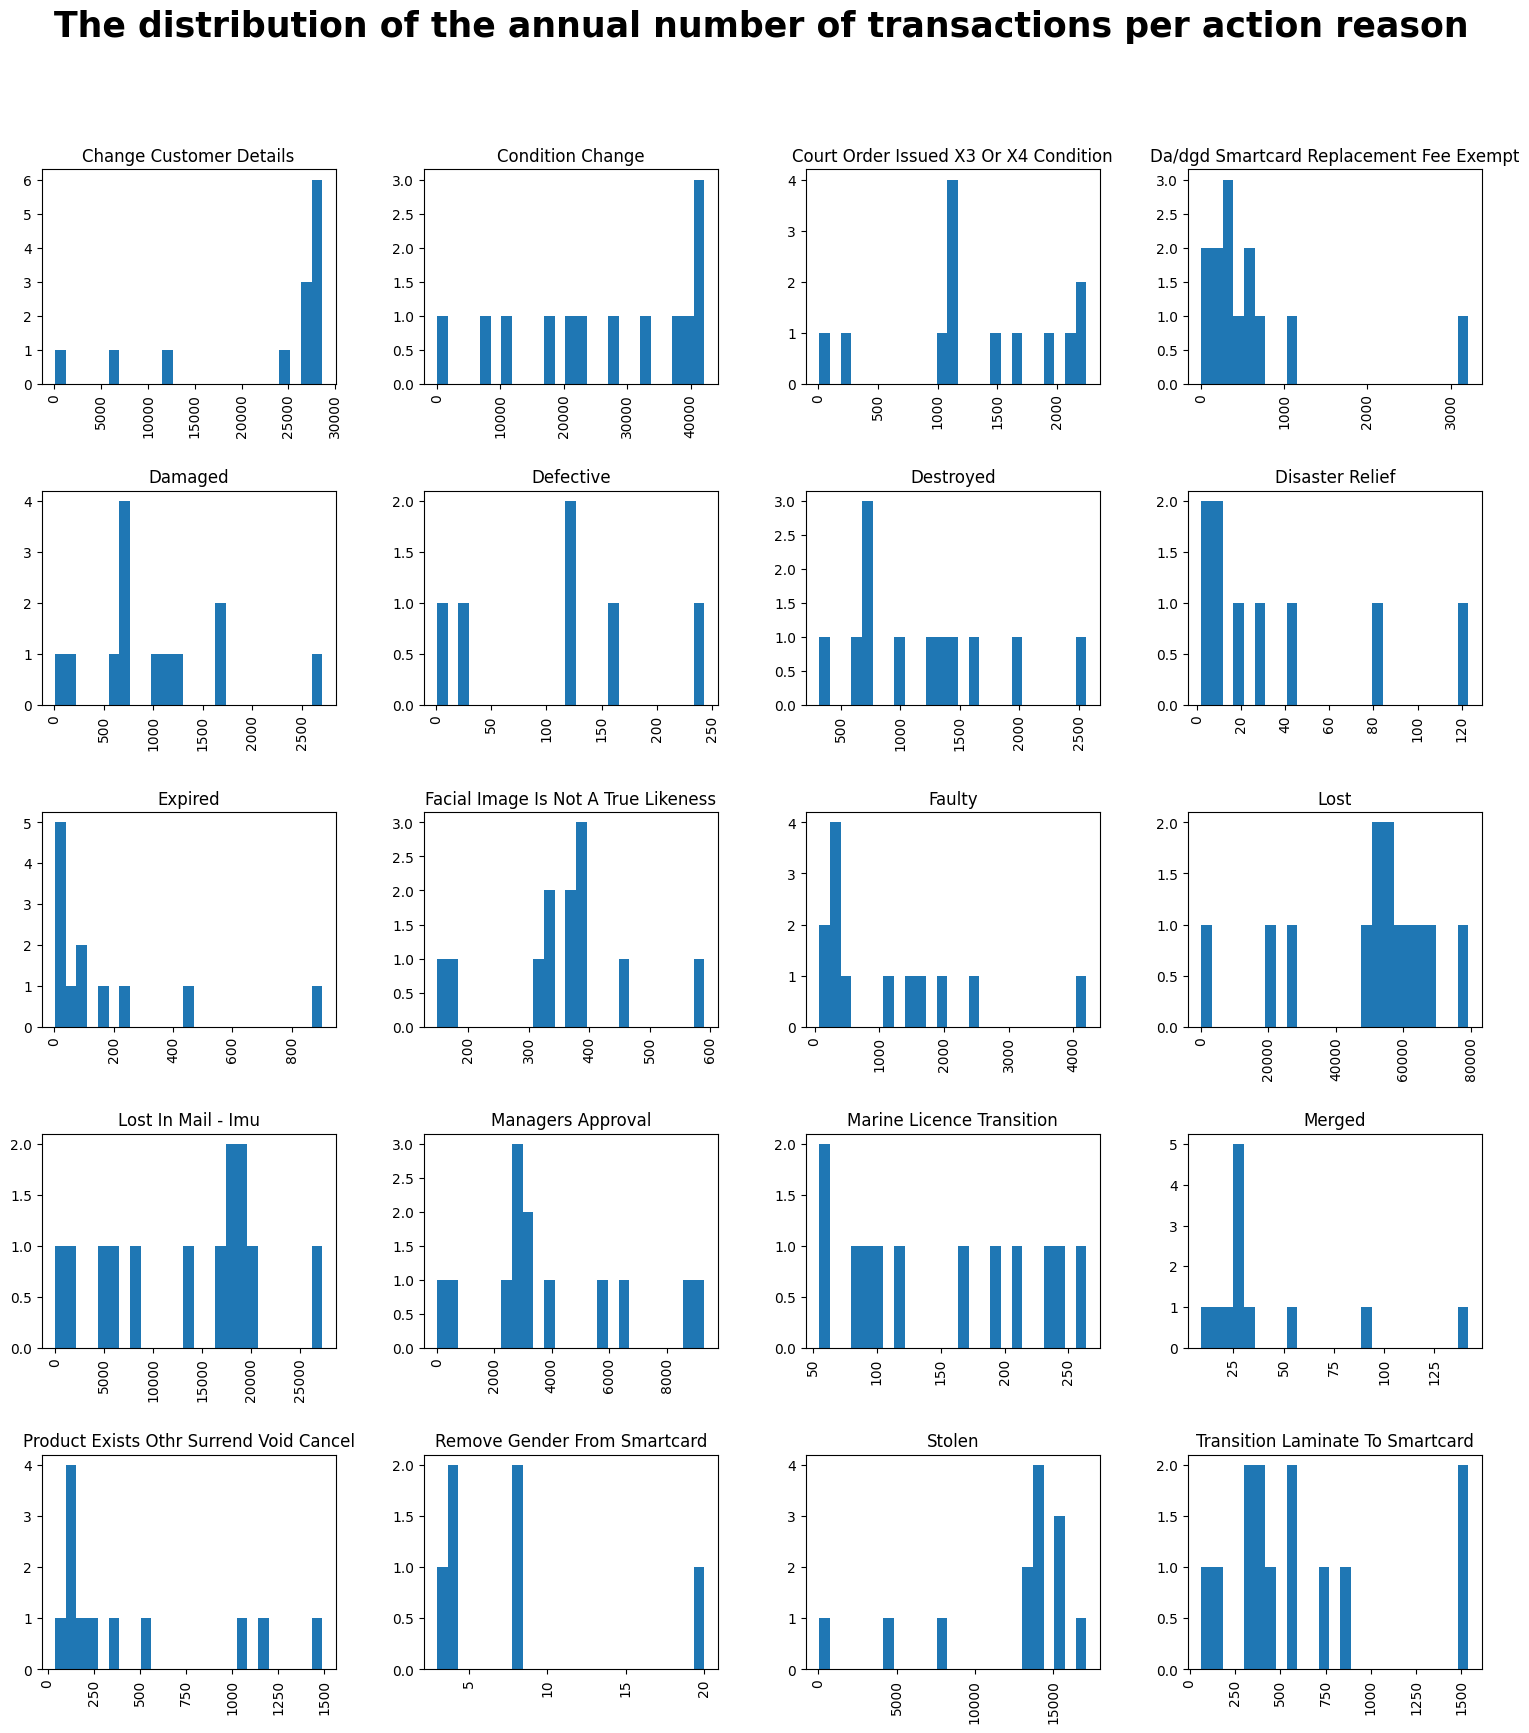

In [20]:
new_df = groupby_annual_reason.reset_index()
histogram = new_df['Number of transactions'].hist(by=new_df['Action Reason'], bins=25, figsize=(18,20))
plt.suptitle("The distribution of the annual number of transactions per action reason", weight='bold', size=25)
plt.show()

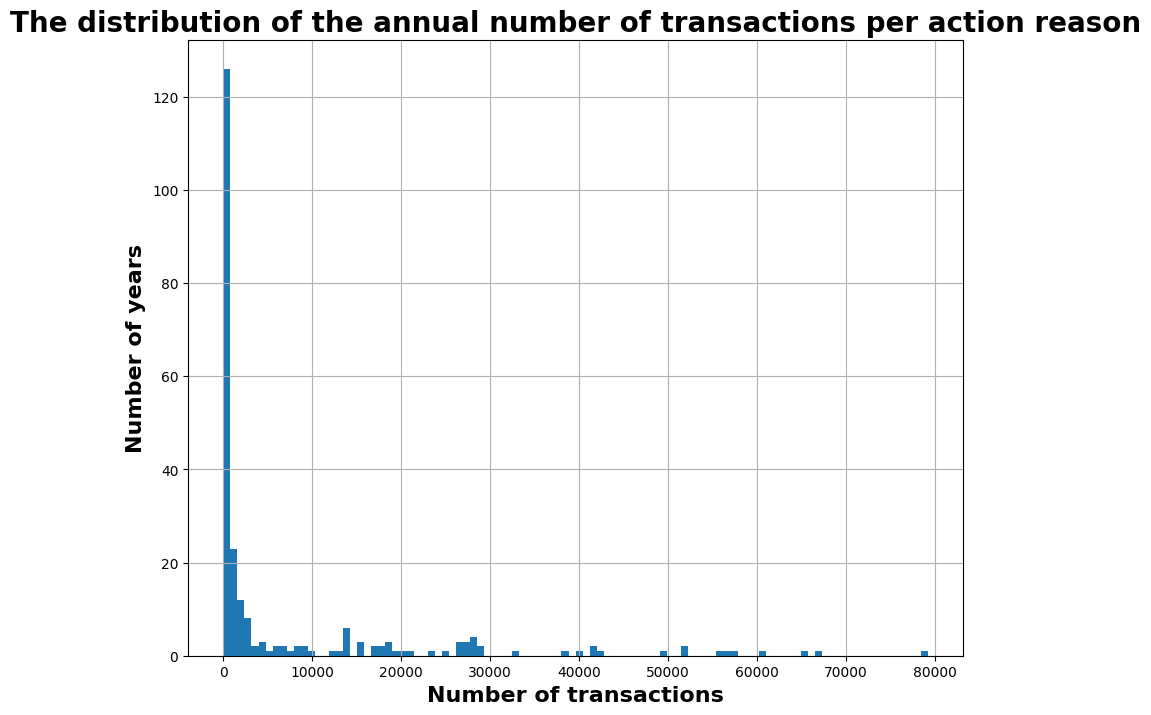

In [21]:
histogram = new_df['Number of transactions'].hist(bins = 100, figsize=(10,8))
histogram.set_title('The distribution of the annual number of transactions per action reason', weight='bold', size=20)
histogram.set_xlabel('Number of transactions', weight='bold', size=16)
histogram.set_ylabel('Number of years', weight='bold', size=16)
plt.show()

#### 5. Observations and comment on the distribution:
- Most of annual number of transactions per action reason are between 0 and 10000, except for Change Customer Details, Condition Change, Lost, Lost In Mail - lmu, and Stolen, which are exceeding 10000 in multiple years.
